# **Predicting H1N1 Vaccine Uptake: Insights for Future Public Health Strategies**

## **Business Understanding**

The constant struggle against the infectious diseases such as H1N1 influenza pandemic in 2009 has also contributed to the understanding of the role of the vaccination in the public health measures. Understanding how individuals respond to vaccines can help shape future health initiatives and improve vaccination rates. By accurately predicting individuals' likelihood of receiving the H1N1 vaccine, this project aims to provide valuable insights to public health organizations, policymakers, and healthcare providers.So, by creating a model, the organizations of public health, lawmakers, and health care providers will be able to identify factors that affect the decision to vaccinate. These insights may help in the design of specific public health campaigns and the most effective distribution of vaccines, and therefore ultimately lessen the transmission of infectious diseases through improved herd immunity. The outcomes of this project can suggest further research avenues and contribute to the creation of measures that would increase the public’s confidence in vaccination and ensure the effective control of present and future epidemics.



## Objectives

- Identify key factors that influence individuals' decisions to receive the H1N1 vaccine.
- Build a predictive model to forecast public response to newly introduced vaccines based on demographic and behavioral data.
- Provide actionable insights to public health organizations for developing targeted vaccination campaigns and strategies.
- Enhance preparedness for future pandemics by understanding vaccine acceptance and hesitancy patterns.

## **Data Understanding**

The dataset used in this project is derived from the National 2009 H1N1 Flu Survey conducted by the United States National Center for Health Statistics. This survey collected responses from individuals across the United States regarding their vaccination status against the H1N1 flu virus and the seasonal flu, alongside various demographic, behavioral, and opinion-based factors. The dataset provides a rich source of information to understand the factors influencing vaccination decisions, making it highly suitable for this project.

### Data Source and Suitability

The data comes from a reputable source, the U.S. Department of Health and Human Services (DHHS), specifically the National Center for Health Statistics (NCHS). The dataset includes responses from thousands of individuals, capturing a broad spectrum of the population. It is suitable for the project as it includes both the target variables (whether individuals received the H1N1 and seasonal flu vaccines) and numerous potential predictors, such as:

- Demographic information (e.g., age, sex, race, education, income)
- Health behaviors (e.g., hand washing, mask-wearing, social distancing)
- Health status (e.g., presence of chronic medical conditions, being a health worker)
- Opinions and concerns about the effectiveness and risks associated with the vaccines.

These features provide comprehensive insights into the factors that may influence an individual's decision to get vaccinated, allowing us to build a predictive model with practical applicability.

### Dataset Size and Descriptive Statistics

The dataset consists of several thousand rows, each representing a unique respondent. There are 36 columns in the dataset, including the respondent ID, two target variables (h1n1_vaccine and seasonal_vaccine), and 34 features.

Let's load the dataset and explore its size and some basic descriptive statistics for all features.


Importing the necessary libaries. 

In [2]:
##import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#sklearn preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

# sklearn classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn evaluation metrics and validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Loading Features Data

In [3]:
# Loading and viewing the first 5 rows of feature data
features_df = pd.read_csv("training_set_features.csv")
features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [9]:
# Check the shape of the features dataset
print(f"Features dataset shape: {features_df.shape}")

Features dataset shape: (26707, 36)


The features dataset contains 26707 observations and 36 features. 

In [10]:
# Check basic information for the features dataset
print("Features dataset info:")
print(features_df.info())

Features dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float6

The features dataset contains a combination of  integers, floatsand object data types. 

Loading Test Data...

In [22]:
# previewing the test dataframe
test_df = pd.read_csv("test_set_features.csv")
test_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [24]:
# Checking the shape of the labels dataset
print(f"Labels dataset shape: {test_df.shape}")

Labels dataset shape: (26708, 36)


The test dataset contains 26708 observations and 36 features. 

In [25]:
# Check basic information for the features dataset
print("Features dataset info:")
print(features_df.info())

Features dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float6

Similar to features dataset, test data contains a combination of  integers, floats and object data types. 

Loading labels dataset...

In [13]:
# Loading the labels dataset
labels_df = pd.read_csv('training_set_labels.csv')
labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [14]:
# Checking the shape of the labels dataset
print(f"Labels dataset shape: {labels_df.shape}")

Labels dataset shape: (26707, 3)


The labels dataframe contains 26707 observations and 3 columns.

In [15]:
# Checking basic information for the labels dataset
print("\nLabels dataset info:")
print(labels_df.info())


Labels dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB
None


The columns have consistent and appropriate data types (integers)

Since the project focuses on predicting whether individuals received the H1N1 vaccine, we can refine the datasets to target this specific variable. The `labels_df` dataset contains both `h1n1_vaccine` and `seasonal_vaccine` as target variables. However, since we are only interested in predicting the `h1n1_vaccine` uptake, we will drop the `seasonal_vaccine` column from `labels_df`.

In [16]:
# Drop the 'seasonal_vaccine' column from labels_df
labels_h1n1_df = labels_df.drop(columns=['seasonal_vaccine'])

In [17]:
# Display the first few rows to confirm the changes
print(labels_h1n1_df.head())

   respondent_id  h1n1_vaccine
0              0             0
1              1             0
2              2             0
3              3             0
4              4             0


Additionally, the `features_df` and `test_df` datasets contains features related to both H1N1 and seasonal flu. To maintain the focus solely on predicting the response to the H1N1 vaccine, I will remove features specifically related to the seasonal flu vaccine from the `features_df` and `test_df`. These features include `doctor_recc_seasonal`, `opinion_seas_vacc_effective`, `opinion_seas_risk`, and `opinion_seas_sick_from_vacc`. By doing this, I ensure that my model is trained on relevant information, enhancing its predictive capability for the H1N1 vaccine.

In [18]:
# List of seasonal flu-related features to drop
seasonal_features_to_drop = [
    'doctor_recc_seasonal',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc'
]

# Drop seasonal flu-related features from features_df
features_h1n1_df = features_df.drop(columns=seasonal_features_to_drop)

# Display the first few rows to confirm the changes
print(features_h1n1_df.head())


   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0               

In [26]:
# List of seasonal flu-related features to drop (same as before)
seasonal_features_to_drop = [
    'doctor_recc_seasonal',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc'
]

# Drop seasonal flu-related features from test_df
test_h1n1_df = test_df.drop(columns=seasonal_features_to_drop)

# Display the first few rows to confirm the changes
print(test_h1n1_df.head())


   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0          26707           2.0             2.0                        0.0   
1          26708           1.0             1.0                        0.0   
2          26709           2.0             2.0                        0.0   
3          26710           1.0             1.0                        0.0   
4          26711           3.0             1.0                        1.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   1.0                   0.0                    1.0   
1                   0.0                   0.0                    0.0   
2                   0.0                   1.0                    1.0   
3                   0.0                   0.0                    0.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          1.0               

By performing these operations, I streamline the datasets to focus on the H1N1 vaccine, ensuring that my model is not confused by irrelevant information about the seasonal flu vaccine. This will likely improve model performance since it reduces noise and concentrates on the specific factors influencing H1N1 vaccination uptake. The refined datasets (`labels_h1n1_df` and `features_h1n1_df`) will now be used for further data preprocessing, model building, and evaluation.

##### Dataframe Description

In [20]:
# features dataframe Description
features_h1n1_df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,3.000000,3.000000


In [21]:
# Labels data Description
labels_h1n1_df.describe()

,respondent_id,h1n1_vaccine
count,26707.000000,26707.000000
mean,13353.000000,0.212454
std,7709.791156,0.409052
min,0.000000,0.000000
25%,6676.500000,0.000000
50%,13353.000000,0.000000
75%,20029.500000,0.000000
max,26706.000000,1.000000


In [28]:
# # Labels data Description
test_h1n1_df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
count,26708.000000,26623.000000,26586.000000,26629.000000,26495.000000,26689.000000,26668.000000,26636.000000,26626.000000,26580.000000,24548.000000,25776.000000,25895.000000,25919.000000,14480.000000,26310.000000,26328.000000,26333.000000,26483.000000,26483.000000
mean,40060.500000,1.623145,1.266042,0.049645,0.729798,0.069279,0.826084,0.351517,0.337227,0.683747,0.222666,0.281037,0.086310,0.111501,0.887914,3.844622,2.326838,2.360612,0.894310,0.543745
std,7710.079831,0.902755,0.615617,0.217215,0.444072,0.253934,0.379045,0.477453,0.472772,0.465022,0.416044,0.449514,0.280827,0.314758,0.315483,1.007570,1.275636,1.359413,0.754244,0.935057
min,26707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,33383.750000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,40060.500000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,46737.250000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,53414.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,3.000000,3.000000


### Data Limitations

While the dataset is comprehensive, there are some limitations:

- Missing Data: Some features have missing values, particularly those related to employment industry and occupation. This could introduce bias if not properly handled.

- Self-Reported Data: The dataset is based on self-reported information, which can be subject to biases such as underreporting or overreporting.

- Temporal Context: The data is from 2009-2010, which may not fully represent current attitudes towards vaccination, especially after the COVID-19 pandemic.

Despite these limitations, the dataset provides a robust foundation for understanding factors influencing vaccine uptake and building predictive models to inform future public health strategies.

## **Data Preparation**

This section prepares data for analysis and modeling. Proper data preparation is crucial for building a robust model. It involves cleaning the data, handling missing values, transforming variables, and ensuring the dataset is suitable for analysis.

### Handling Missing Data
Missing data can significantly affect the performance of a machine learning model. We will first identify the columns with missing values and decide on an appropriate strategy to handle them.

#### Missing values in feature data

In [45]:
# Check for missing values in features_h1n1_df
missing_values_features = features_h1n1_df.isnull().sum()
missing_values_features = missing_values_features[missing_values_features > 0]
missing_values_features_percentage = (missing_values_features / len(features_h1n1_df)) * 100
print("Missing Values in Features Dataset:\n")
print(missing_values_features_percentage)

Missing Values in Features Dataset:

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
education                       5.268282
income_poverty                 16.561201
marital_status                  5.272026
rent_or_own                     7.645936
employment_status               5.477965
household_adults                0.932340
household_children  

Visualization for missing data for features data

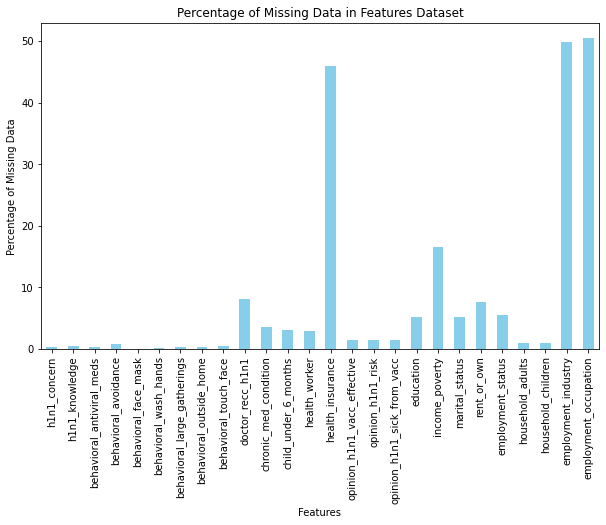

In [56]:
# Visualize missing data for features_h1n1_df using a bar graph
plt.figure(figsize=(10, 6))
missing_values_features_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Data in Features Dataset')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Data')
plt.xticks(rotation=90)
plt.show()



In [52]:
# Check for missing values in label_h1n1_df
missing_values_labels = labels_h1n1_df.isnull().sum()
missing_values_labels = missing_values_labels[missing_values_labels > 0]
missing_values_labels_percentage = (missing_values_labels / len(labels_h1n1_df)) * 100
print("\nMissing Values in Labels Dataset:\n")
print(missing_values_labels_percentage)


Missing Values in Labels Dataset:

Series([], dtype: float64)


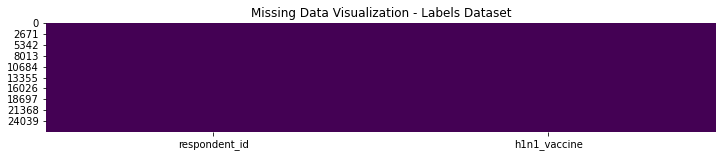

In [54]:
# Visualize missing data for label_h1n1_df
plt.figure(figsize=(12, 2))
sns.heatmap(labels_h1n1_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization - Labels Dataset')
plt.show()